In [1]:
platform    = 'amd-ryzen_7_1800X-linux-gcc-13.2.1'
type        = 'double_centred'

In [2]:
algos       = ['amaru', 'dragonbox']
metric      = 'elapsed'
stats       = ['mean', 'std', 'min', 'median', 'max']

In [3]:
import pandas as pd
import plotly.graph_objects as go

In [175]:
results     = pd.read_csv(f'../results/{platform}/{type}.csv', sep = ';')
algos_data  = pd.Series([results[results['algorithm'] == algo][['binary', metric]].set_index('binary')
    for algo in algos], index = algos)

In [178]:
metric_data = algos_data['amaru'].rename(columns = {metric:'amaru'}).join(algos_data['dragonbox'].rename(columns = {metric:'dragonbox'}))
size        = len(metric_data)

In [189]:
w = metric_data.apply(lambda t : t['amaru'] <  t['dragonbox'], axis = 1)
d = metric_data.apply(lambda t : t['amaru'] == t['dragonbox'], axis = 1)
l = metric_data.apply(lambda t : t['amaru'] >  t['dragonbox'], axis = 1)
print(f' \
Winnings = {len(w[w == True].index) / size:3.1%}\n \
Draws    = {len(d[d == True].index) / size:3.1%}\n \
Losses   = {len(l[l == True].index) / size:3.1%}\n \
')


 Winnings = 99.7%
 Draws    = 0.0%
 Losses   = 0.3%
 


In [5]:
stats_data  = pd.DataFrame([[getattr(algos_data[algo][metric], stat)() for stat in stats] for algo in algos], index = algos, columns = stats)
baseline    = stats_data['mean']['amaru']
stats_data['relative'] = [stats_data['mean'][algo] / baseline for algo in algos]
stats_data.style.format('{:.2e}')

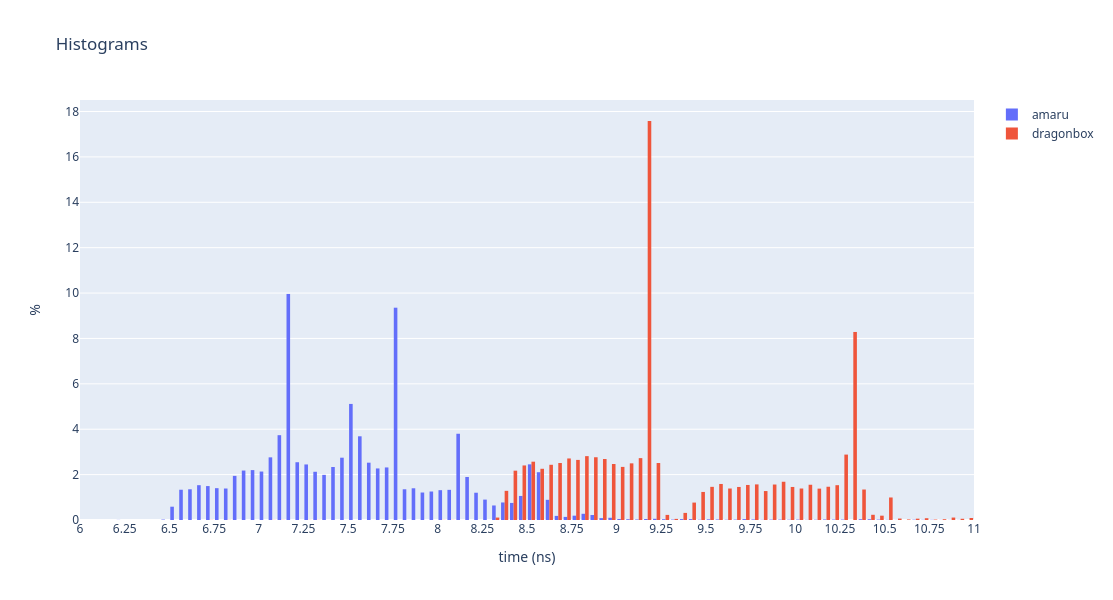

In [6]:
histograms = [go.Histogram(x = algos_data[algo][metric] / 1.0e-9, name = algo, histnorm = 'percent') for algo in algos]
figure     = go.Figure(data = histograms)

figure.update_layout(title = 'Histograms', height = 600, yaxis_title = '%', xaxis_title = 'time (ns)')

figure.update_xaxes(autorangeoptions_clipmin = 6, autorangeoptions_clipmax = 11, dtick = 0.25)

figure.show()